In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# DATA READING AND EMPLORATORY DATA ANALYSIS

In [2]:
df = pd.read_csv("C:\\Users\\subha\\Downloads\\Data for twitter sentiment classification\\Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [4]:
df.shape

(162980, 2)

In [5]:
df.dtypes

clean_text     object
category      float64
dtype: object

In [6]:
np.sum(df.isnull().any(axis=1))

11

In [7]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [10]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


([<matplotlib.axis.XTick at 0x26be5995370>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')])

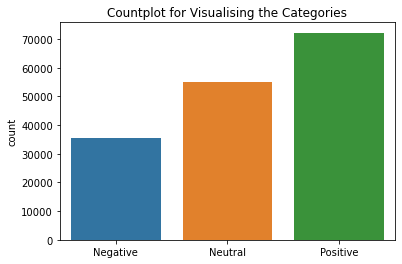

In [11]:
a = []
for i in df.category:
    if i == -1:
        a.append(-1)
    elif i == 0:
        a.append(0)
    else:
        a.append(1)
        
sns.countplot(a)
plt.title("Countplot for Visualising the Categories")
plt.xticks([0,1,2],['Negative','Neutral','Positive'])

In [12]:
df['Sentiment'] = a
df_final = df[['clean_text','Sentiment']]
df_final.head(5)

,clean_text,Sentiment
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [13]:
df['Sentiment'].value_counts()

 1    72249
 0    55211
-1    35509
Name: Sentiment, dtype: int64

# DATA CLEANING

In [14]:
#removing punctuations , URLs , numbers, special characters from the dataset
#removing the @ (patterns in the data)
def remove_at(text , pattern):
    r = re.findall(pattern,text)
    for i in r:
        text = re.sub(i, "",text)
    return text

df['cleaned_tweets'] = np.vectorize(remove_at)(df['clean_text'], "@[\w]*")
df.head(10)
    

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi


In [15]:
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x: x.lower())
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi


In [16]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [17]:
def indict(text , dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text
            
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x: indict(x,apostrophe_dict))
df.head()

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...


In [18]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}
short_word_dict

{'121': 'one to one',
 'a/s/l': 'age, sex, location',
 'adn': 'any day now',
 'afaik': 'as far as I know',
 'afk': 'away from keyboard',
 'aight': 'alright',
 'alol': 'actually laughing out loud',
 'b4': 'before',
 'b4n': 'bye for now',
 'bak': 'back at the keyboard',
 'bf': 'boyfriend',
 'bff': 'best friends forever',
 'bfn': 'bye for now',
 'bg': 'big grin',
 'bta': 'but then again',
 'btw': 'by the way',
 'cid': 'crying in disgrace',
 'cnp': 'continued in my next post',
 'cp': 'chat post',
 'cu': 'see you',
 'cul': 'see you later',
 'cul8r': 'see you later',
 'cya': 'bye',
 'cyo': 'see you online',
 'dbau': 'doing business as usual',
 'fud': 'fear, uncertainty, and doubt',
 'fwiw': "for what it's worth",
 'fyi': 'for your information',
 'g': 'grin',
 'g2g': 'got to go',
 'ga': 'go ahead',
 'gal': 'get a life',
 'gf': 'girlfriend',
 'gfn': 'gone for now',
 'gmbo': 'giggling my butt off',
 'gmta': 'great minds think alike',
 'h8': 'hate',
 'hagn': 'have a good night',
 'hdop': 'help d

In [19]:
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x: indict(x, short_word_dict))
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi


In [20]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [21]:
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x : indict(x,emoticon_dict))
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi


In [22]:
#To clear punctuation marks in the clean_text column
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi


In [23]:
#to replace special characters from the clean_text column
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi


In [24]:
#to remove numbers from the tweets
df.cleaned_tweets = df.cleaned_tweets.apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi


In [25]:
import nltk
from nltk.tokenize import word_tokenize
df['tokenized_cleantext'] = df.cleaned_tweets.apply(lambda x: word_tokenize(x))
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets,tokenized_cleantext
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised minimum government maximum...,"[when, modi, promised, minimum, government, ma..."
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,..."
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom..."
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu..."
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]"
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...,"[surat, women, perform, yagna, seeks, divine, ..."
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...,"[this, comes, from, cabinet, which, has, schol..."
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,..."
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi,"[gandhi, was, gay, does, modi]"


In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
df['token_filtered'] = df['tokenized_cleantext'].apply(lambda x: [word for word in x if not word in stop_words])
df.head(10)

,clean_text,category,Sentiment,cleaned_tweets,tokenized_cleantext,token_filtered
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised minimum government maximum...,"[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today..."
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]","[kiya, tho, refresh, maarkefir, comment, karo]"
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...,"[surat, women, perform, yagna, seeks, divine, ...","[surat, women, perform, yagna, seeks, divine, ..."
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...,"[this, comes, from, cabinet, which, has, schol...","[comes, cabinet, scholars, like, modi, smriti,..."
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[upcoming, election, india, saga, going, impor..."
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi,"[gandhi, was, gay, does, modi]","[gandhi, gay, modi]"


In [28]:
from nltk.stem import PorterStemmer
nltk.download('wordnet')
stemming = PorterStemmer()

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

df['tweet_stemmed'] = df['token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

df['tweet_lemmatized'] = df['token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

df.head(10)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_text,category,Sentiment,cleaned_tweets,tokenized_cleantext,token_filtered,tweet_stemmed,tweet_lemmatized
0,when modi promised “minimum government maximum...,-1.0,-1,when modi promised minimum government maximum...,"[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...",modi promis minimum govern maximum govern expe...,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,0,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...","[talk, nonsense, continue, drama, vote, modi]",talk nonsens continu drama vote modi,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,1,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...","[say, vote, modi, welcome, bjp, told, rahul, m...",say vote modi welcom bjp told rahul main campa...,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,1,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...",ask support prefix chowkidar name modi great s...,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,1,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...",answer among power world leader today trump pu...,answer among powerful world leader today trump...
5,kiya tho refresh maarkefir comment karo,0.0,0,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]","[kiya, tho, refresh, maarkefir, comment, karo]",kiya tho refresh maarkefir comment karo,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0.0,0,surat women perform yagna seeks divine grace f...,"[surat, women, perform, yagna, seeks, divine, ...","[surat, women, perform, yagna, seeks, divine, ...",surat women perform yagna seek divin grace nar...,surat woman perform yagna seek divine grace na...
7,this comes from cabinet which has scholars lik...,0.0,0,this comes from cabinet which has scholars lik...,"[this, comes, from, cabinet, which, has, schol...","[comes, cabinet, scholars, like, modi, smriti,...",come cabinet scholar like modi smriti hema tim...,come cabinet scholar like modi smriti hema tim...
8,with upcoming election india saga going import...,1.0,1,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...","[upcoming, election, india, saga, going, impor...",upcom elect india saga go import pair look cur...,upcoming election india saga going important p...
9,gandhi was gay does modi,1.0,1,gandhi was gay does modi,"[gandhi, was, gay, does, modi]","[gandhi, gay, modi]",gandhi gay modi,gandhi gay modi


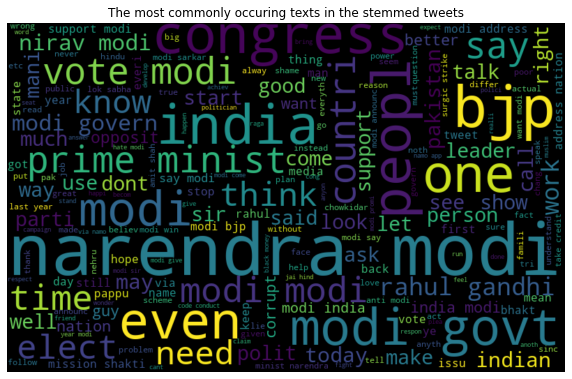

In [29]:
fullwords = ' '.join([text for text in df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fullwords)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("The most commonly occuring texts in the stemmed tweets")
plt.show()

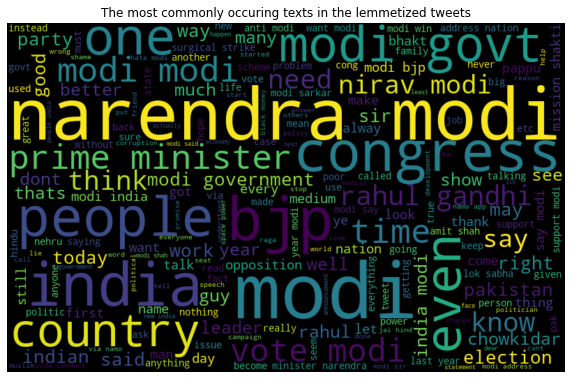

In [30]:
fullwords_1 = ' '.join([text for text in df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fullwords_1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("The most commonly occuring texts in the lemmetized tweets")
plt.show()

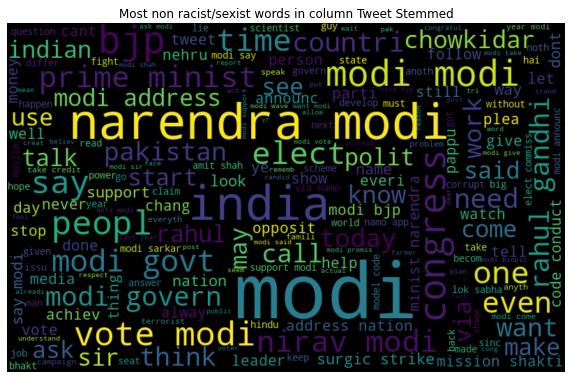

In [31]:
good_words =' '.join([text for text in df['tweet_stemmed'][df['category'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(good_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

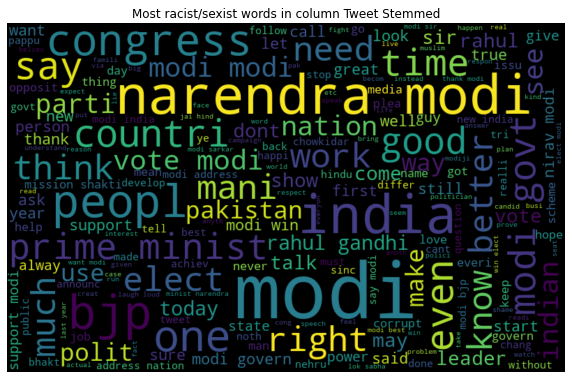

In [32]:
bad_words =' '.join([text for text in df['tweet_stemmed'][df['category'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(bad_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

# MODEL BUILDING AND TRANSFORMATION ON THE CLEANED DATA 

In [33]:
#Extracting Bag of words feature from the lemmatized and stemmed tweets 
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
vectorize_stem = bow_vectorizer.fit_transform(df['tweet_stemmed'])
vectorize_lem = bow_vectorizer.fit_transform(df['tweet_lemmatized'])

In [34]:
df_stemmed = df[['tweet_stemmed','category']]
df_lem = df[['tweet_lemmatized','category']]
print(df_stemmed.shape,df_lem.shape)
df_stemmed.head(10)

(162969, 2) (162969, 2)


,tweet_stemmed,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seek divin grace nar...,0.0
7,come cabinet scholar like modi smriti hema tim...,0.0
8,upcom elect india saga go import pair look cur...,1.0
9,gandhi gay modi,1.0


In [49]:
#split the data in train and test sets so that the model can learn from the train and then perform in the test set
#1. On the Stemmed dataset

from sklearn.model_selection import train_test_split
x_train_stem, x_test_stem, y_train_stem, y_test_stem = train_test_split(df_stemmed['tweet_stemmed'], df_stemmed["category"], test_size = 0.3, random_state = 43)

#2. On the Lemmetized dataset
x_train_lem, x_test_lem, y_train_lem, y_test_lem = train_test_split(df_lem['tweet_lemmatized'], df_lem["category"], test_size = 0.3, random_state = 42)

print("STEM SETS: " ,x_train_stem.shape , x_test_stem.shape, y_train_stem.shape, y_test_stem.shape)
print("LEM SETS: ", x_train_lem.shape, x_test_lem.shape, y_train_lem.shape, y_test_lem.shape)

STEM SETS:  (114078,) (48891,) (114078,) (48891,)
LEM SETS:  (114078,) (48891,) (114078,) (48891,)


In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train_stem)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)
x_test_counts = count_vect.transform(x_test_stem)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(114078, 64718)
(114078, 64718)
(48891, 64718)
(48891, 64718)


In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train_stem)
predictions = model.predict(x_test_tfidf) 
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test_stem,predictions)


f1_score(y_test_stem,predictions,average ="micro")

from sklearn.metrics import accuracy_score
accuracy_score(y_test_stem,predictions)*100


79.07590354052894

In [60]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(x_train_tfidf,y_train_stem)
predictions_2 = model_2.predict(x_test_tfidf) 
confusion_matrix(y_test_stem,predictions_2)
f1_score(y_test_stem,predictions_2,average ="micro")
accuracy_score(y_test_stem,predictions_2)*100

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.97623284449081

Therefore Logistic Regression works well with the given set of data because of its higher accuracy.